In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

/Users/Adam/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
mdata = pd.read_csv('data/2013_movies.csv').dropna()
mdata.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [3]:
data = pd.DataFrame()
data['dtg']   = mdata.DomesticTotalGross
data['ones']  = np.ones(len(data.dtg.tolist()))
data['bd']    = mdata.Budget
data['R']     = mdata.Rating == 'R'
data['R']     = data.R.astype(int)
data['PG13']  = mdata.Rating == 'PG-13'
data['PG13']  = data['PG13'].astype(int)
data['PG']    = mdata.Rating == 'PG'
data['PG']    = data.PG.astype(int)

In [4]:
mdata.groupby('Rating').groups.keys()

['R', 'PG', 'PG-13']

In [5]:
model = sm.OLS(data.dtg, data.ones)
fit = model.fit()
fit.summary()

/Users/Adam/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 29 Jan 2018   Prob (F-statistic):                nan
Time:                        14:13:09   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones        1.035e+08   9.43e+06     10.975      0.000    8.48e+07    1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model just predicts the mean as the constant, which is why the R^2 is zero since it does no better or worse than guessing the mean.

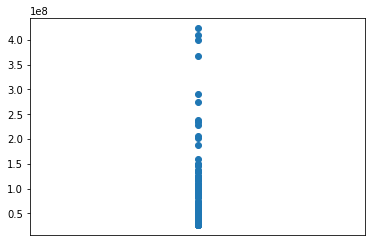

In [6]:
plt.scatter(data.ones,data.dtg)
plt.xticks([]);

(array([ 37.,  21.,  14.,   3.,   3.,   3.,   2.,   0.,   1.,   3.]),
 array([ -7.79470246e+07,  -3.80370450e+07,   1.87293456e+06,
          4.17829142e+07,   8.16928938e+07,   1.21602873e+08,
          1.61512853e+08,   2.01422833e+08,   2.41332812e+08,
          2.81242792e+08,   3.21152771e+08]),
 <a list of 10 Patch objects>)

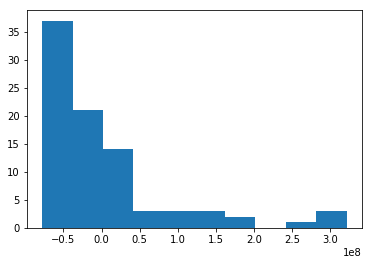

In [7]:
plt.hist(fit.resid)

**Question 2**

In [8]:
y, X = patsy.dmatrices('dtg ~ ones + bd', data=data, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           1.19e-07
Time:                        14:13:09   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.222e+07    6.5e+06      3.418      0.001    9.29e+06    3.51e+07
ones        2.222e+07    6.5e+06      3.418      0.001    9.29e+06    3.51e+07
bd             0.7831      0.135      5.782      0.000       0.514       1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.66e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

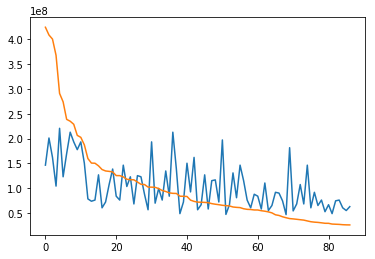

In [9]:
plt.plot(zip(fit.fittedvalues,data.dtg));

**Challenge 3**

In [10]:
y, X = patsy.dmatrices('dtg ~ ones + bd + PG13 + R', data=data, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           3.25e-06
Time:                        14:13:10   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.887e+07   1.25e+07      2.303      0.024    3.94e+06    5.38e+07
ones        2.887e+07   1.25e+07      2.303      0.024    3.94e+06    5.38e+07
bd             0.7806      0.156      5.005      0.000       0.470       1.091
PG13       -1.711e+07   2.35e+07     -0.728      0.468   -6.38e+07    2.96e+07
R          -1.384e+07   2.57e+07     -0.539      0.591   -6.49e+07    3.72e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     4.70e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.63e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We're seeing corrections in the intercept here by -1.7, -1.3 and 0 (modulo the actual difference in reported intercept 2.88-2.22)

**Challenge 4**

In [11]:
data['MeanDeviation'] = mdata.Runtime
data['MeanDeviation'] = (data['MeanDeviation'] - data['MeanDeviation'].mean()).abs()

In [12]:
y, X = patsy.dmatrices('dtg ~ ones + bd + PG13 + R + MeanDeviation', data=data, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     8.366
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           1.04e-05
Time:                        14:13:10   Log-Likelihood:                -1699.5
No. Observations:                  87   AIC:                             3409.
Df Residuals:                      82   BIC:                             3421.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.606e+07   1.35e+07      1.933      0.057   -7.63e+05    5.29e+07
ones           2.606e+07   1.35e+07      1.933      0.057   -7.63e+05    5.29e+07
bd                0.7718      0.157      4.906      0.000       0.459       1.085
PG13           -1.69e+07   2.36e+07     -0.716      0.476   -6.38e+07       3e+07
R             -1.414e+07   2.58e+07     -0.549      0.585   -6.54e+07    3.71e+07
MeanDeviation  4.438e+05   7.66e+05      0.580      0.564   -1.08e+06    1.97e+06
==============================================================================
Omnibus:                       35.538   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.069
Skew:                           1.504   Prob(JB):                     1.84e-17
Kurtosis:                       6.495   Cond. No.                     3.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.34e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Challenge 5**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [14]:
model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     4.019
Date:                Mon, 29 Jan 2018   Prob (F-statistic):             0.0192
Time:                        14:13:10   Log-Likelihood:                -406.08
No. Observations:                  21   AIC:                             822.2
Df Residuals:                      16   BIC:                             827.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.962e+07   3.35e+07      1.481      0.158   -2.14e+07    1.21e+08
ones           4.962e+07   3.35e+07      1.481      0.158   -2.14e+07    1.21e+08
bd                0.8083      0.328      2.464      0.025       0.113       1.504
PG13          -6.914e+07   4.42e+07     -1.565      0.137   -1.63e+08    2.45e+07
R             -7.623e+07   5.02e+07     -1.520      0.148   -1.83e+08    3.01e+07
MeanDeviation -1.055e+05   1.87e+06     -0.057      0.956   -4.06e+06    3.85e+06
==============================================================================
Omnibus:                       18.516   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.331
Skew:                           1.473   Prob(JB):                     1.16e-06
Kurtosis:                       7.749   Cond. No.                     9.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

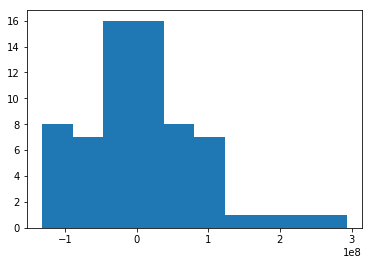

In [15]:
plt.hist(y_test.dtg-fit.predict(X_test));